In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
from plotly.tools import FigureFactory as ff

%matplotlib inline

In [2]:
hf_data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

## Age Group

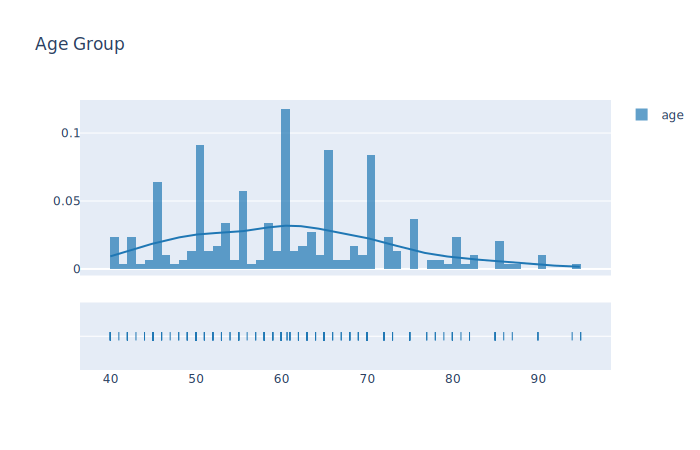

In [3]:
h_data =[hf_data["age"].values]
age_group = ['age'] 

fig = ff.create_distplot(h_data, age_group)
fig.update_layout(title_text='Age Group')

fig.show(renderer="svg")

## Plotting total age groups vs the age groups of death event

In [4]:
age = hf_data['age']
death = hf_data['DEATH_EVENT']

Text(0, 0.5, 'Count')

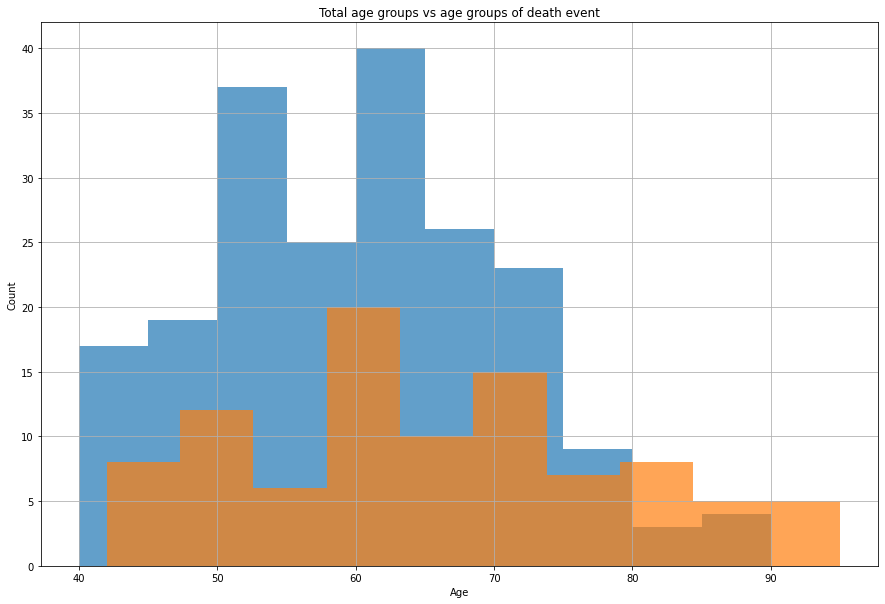

In [5]:
hf_data.groupby(death).age.hist(figsize = (15,10), alpha=0.7)

plt.title('Total age groups vs age groups of death event')
plt.xlabel('Age')
plt.ylabel('Count')

## Value counts of males and females

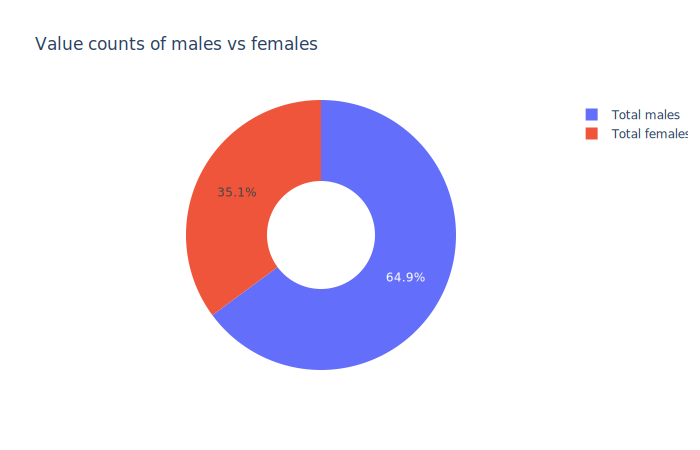

In [6]:
labels = ['Total females', 'Total males']
values = [len(hf_data[hf_data['sex'] == 0]), len(hf_data[hf_data['sex'] == 1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Value counts of males vs females')
fig.show(renderer="svg")

## Value counts of genders that survived and died

In [7]:
female = hf_data[hf_data['sex'] == 0]
male = hf_data[hf_data['sex'] == 1]

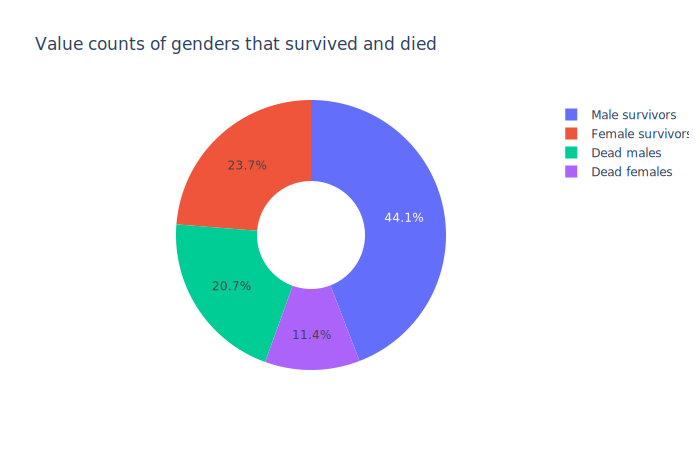

In [8]:
labels = ['Male survivors', 'Dead males', 'Female survivors', 'Dead females']
values = [(male['DEATH_EVENT'] == 0).sum(), (male['DEATH_EVENT'] == 1).sum(), (female['DEATH_EVENT'] == 0).sum(), (female['DEATH_EVENT'] == 1).sum()]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Value counts of genders that survived and died')
fig.show(renderer="svg")

## Value counts of genders with high blood pressure

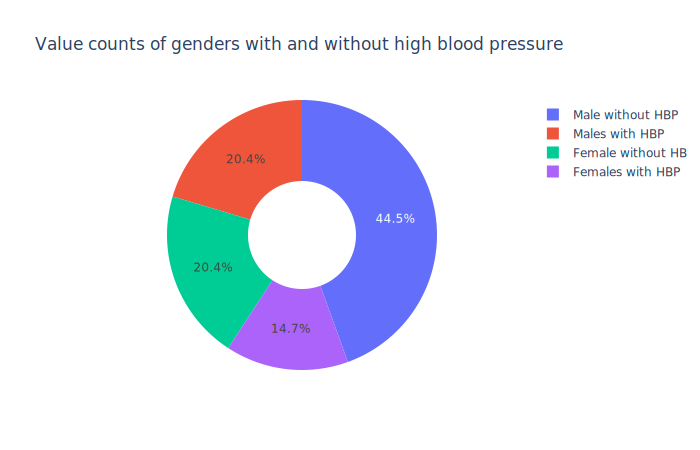

In [9]:
labels = ['Male without HBP', 'Males with HBP', 'Female without HBP', 'Females with HBP']
values = [(male['high_blood_pressure'] == 0).sum(), (male['high_blood_pressure'] == 1).sum(), (female['high_blood_pressure'] == 0).sum(), (female['high_blood_pressure'] == 1).sum()]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Value counts of genders with and without high blood pressure')
fig.show(renderer="svg")

## Creatinine phosphokinase death event

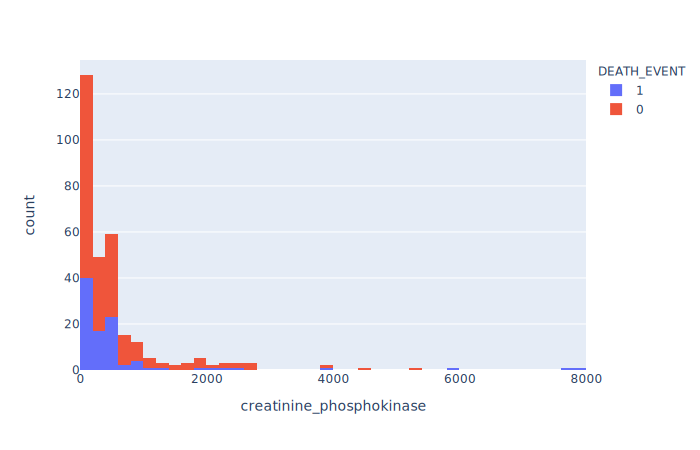

In [10]:
fig = px.histogram(hf_data, x = 'creatinine_phosphokinase', color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Ejection fraction death event

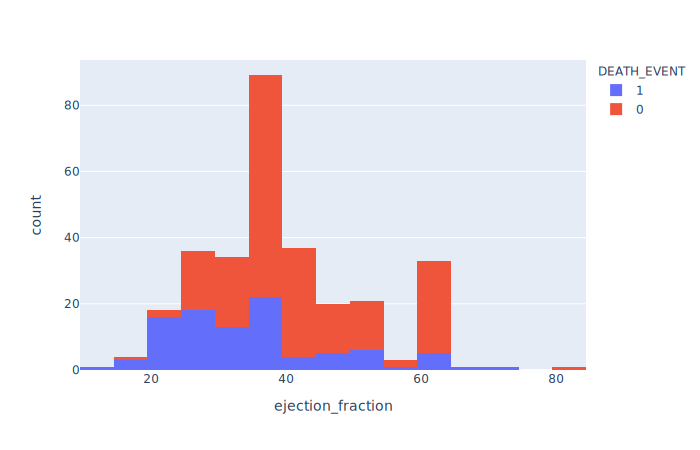

In [11]:
fig = px.histogram(hf_data, x = 'ejection_fraction', color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Platelets death event

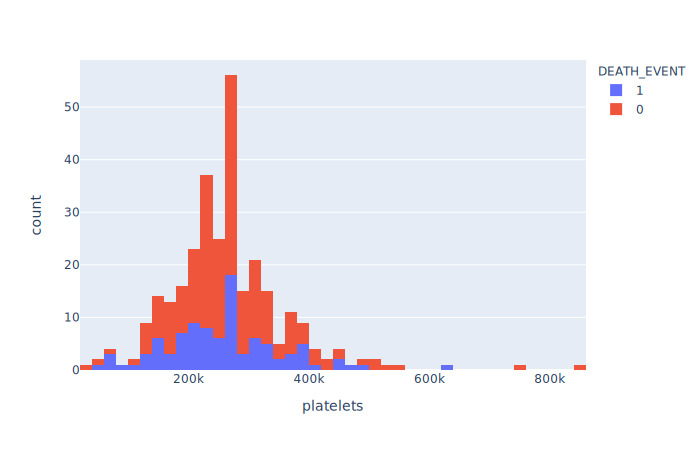

In [12]:
fig = px.histogram(hf_data, x = 'platelets', color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Serum creatinine death event

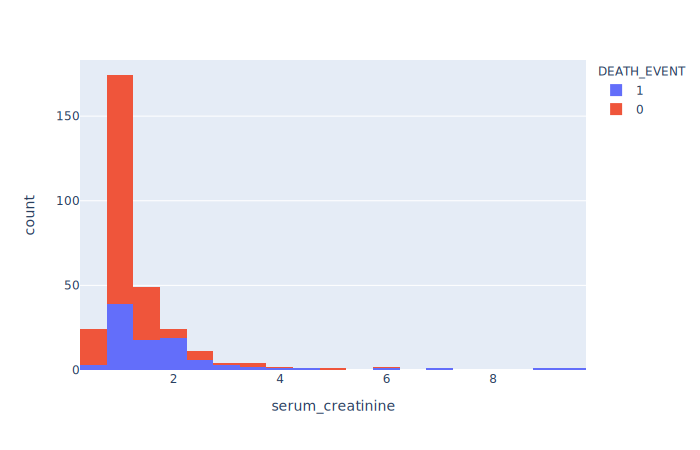

In [13]:
fig = px.histogram(hf_data, x = 'serum_creatinine', color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Serum sodium death event

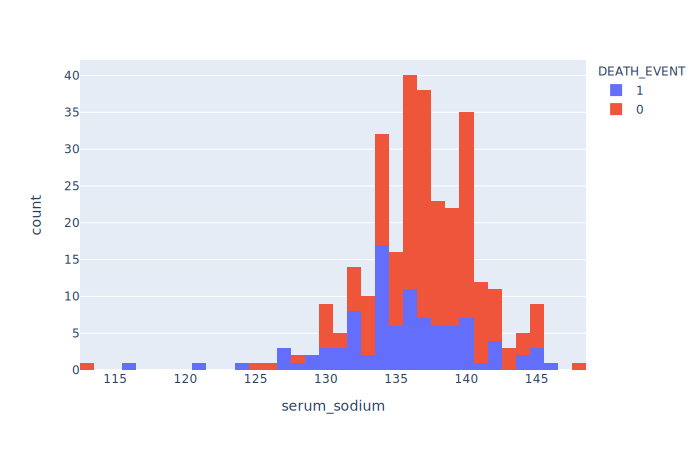

In [14]:
fig = px.histogram(hf_data, x = 'serum_sodium', color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Value counts of diabetic genders

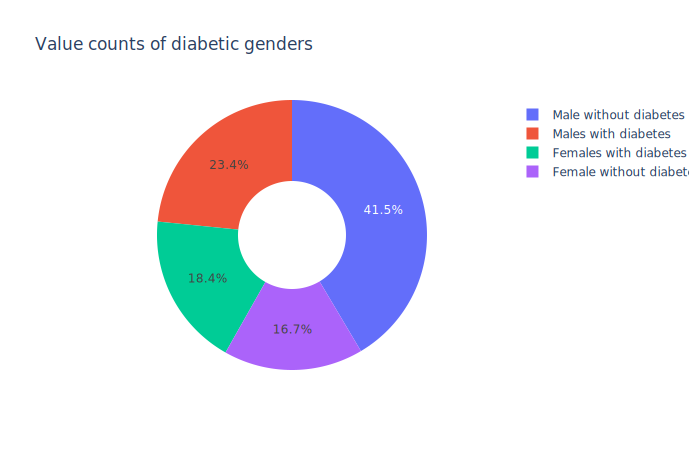

In [15]:
labels = ['Male without diabetes', 'Males with diabetes', 'Female without diabetes', 'Females with diabetes']
values = [(male['diabetes'] == 0).sum(), (male['diabetes'] == 1).sum(), (female['diabetes'] == 0).sum(), (female['diabetes'] == 1).sum()]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Value counts of diabetic genders')
fig.show(renderer="svg")

## Value counts of genders with anaemia

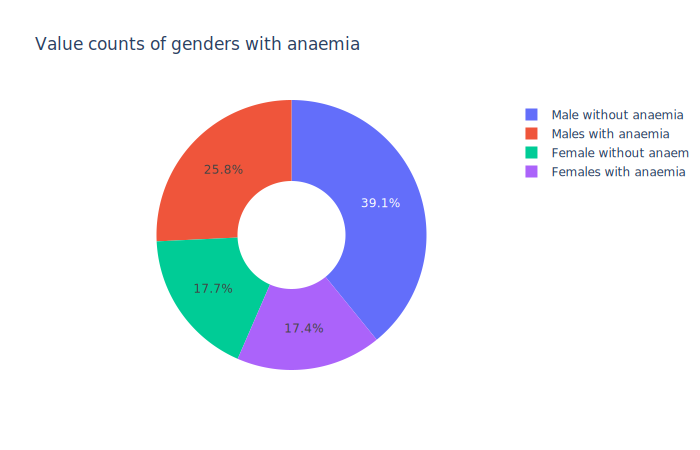

In [16]:
labels = ['Male without anaemia', 'Males with anaemia', 'Female without anaemia', 'Females with anaemia']
values = [(male['anaemia'] == 0).sum(), (male['anaemia'] == 1).sum(), (female['anaemia'] == 0).sum(), (female['anaemia'] == 1).sum()]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Value counts of genders with anaemia')
fig.show(renderer="svg")

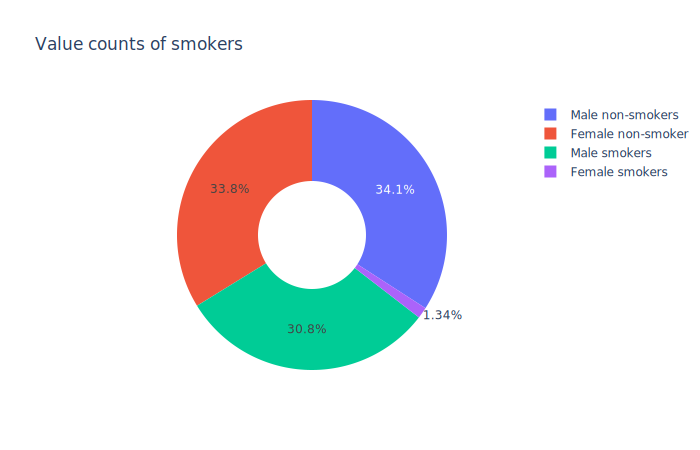

In [17]:
labels = ['Male non-smokers', 'Male smokers', 'Female non-smokers', 'Female smokers']
values = [(male['smoking'] == 0).sum(), (male['smoking'] == 1).sum(), (female['smoking'] == 0).sum(), (female['smoking'] == 1).sum()]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Value counts of smokers')
fig.show(renderer="svg")

## Death event of patients with and without high blood pressure 

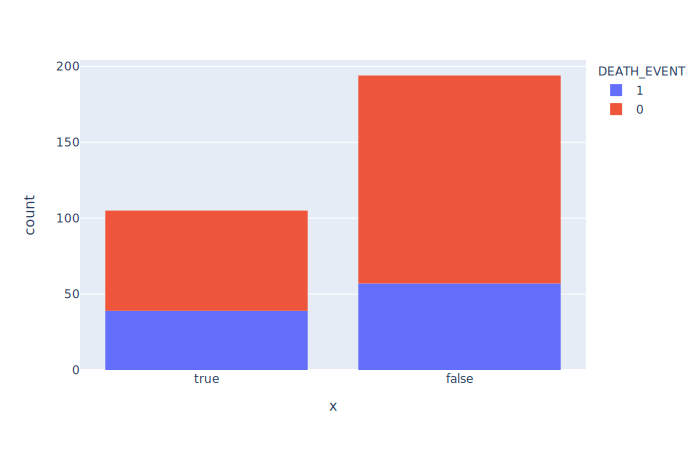

In [18]:
hbp = hf_data['high_blood_pressure'] == 1
fig = px.histogram(hf_data, x = hbp, color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Death event of non-diabetic and diabetic patients

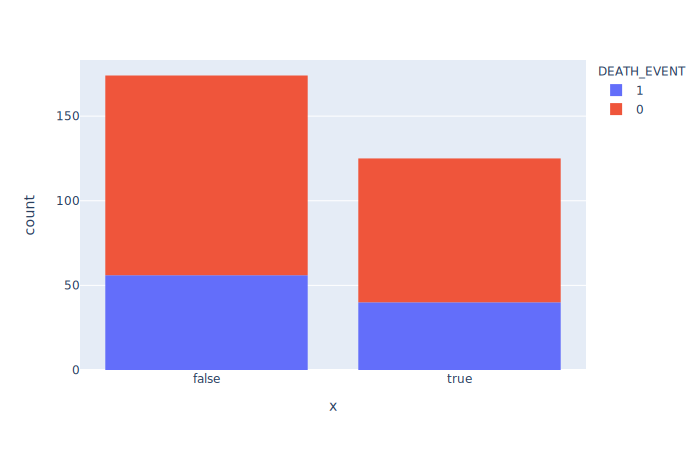

In [19]:
dia = hf_data['diabetes'] == 1
fig = px.histogram(hf_data, x = dia, color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Death event of patients with and without anaemia

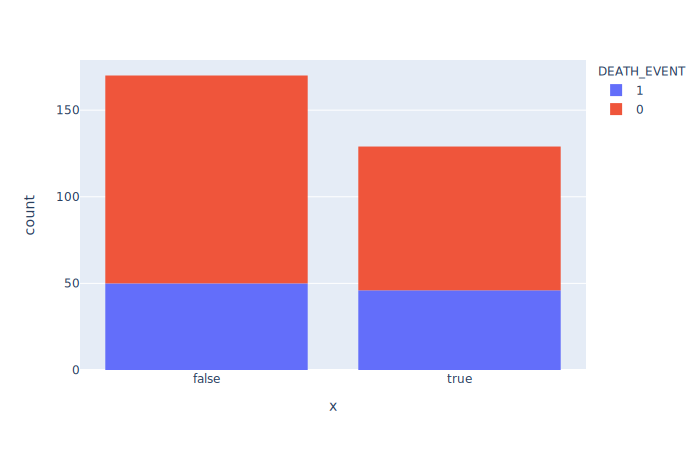

In [20]:
ana = hf_data['anaemia'] == 1
fig = px.histogram(hf_data, x = ana, color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Death event of smokers

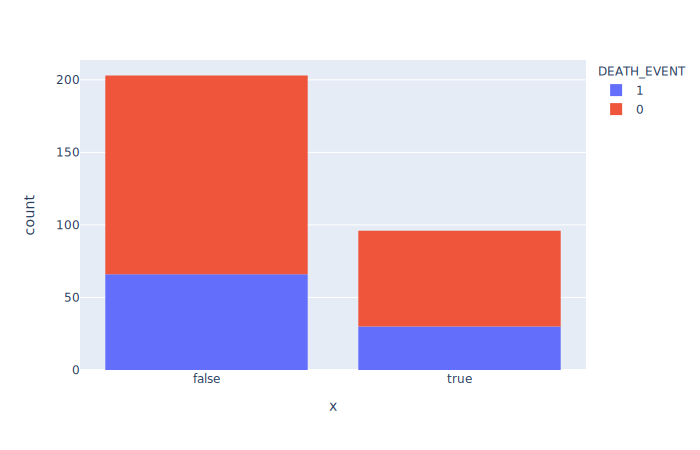

In [21]:
smk = hf_data['smoking'] == 1
fig = px.histogram(hf_data, x = smk, color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Dataset correlations

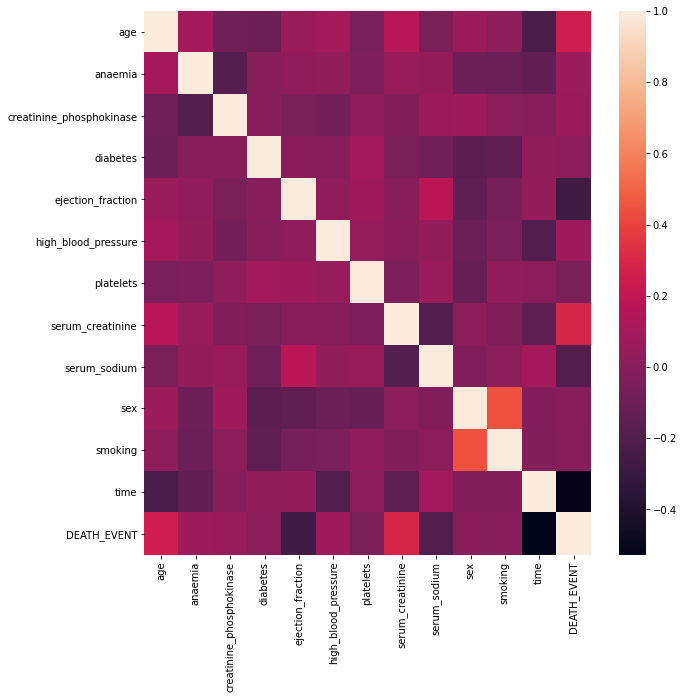

In [22]:
plt.figure(figsize = (10, 10))
sns.heatmap(hf_data.corr())